# 데이터 EDA 및 전처리 작업

## 1. 데이터 EDA

In [3]:
import pandas as pd

# Load data from s3
bucket = ''

train_file = 'data/unsmile_train_v1.0.tsv'
test_file = 'data/unsmile_valid_v1.0.tsv'

s3_uri_train = 's3://{}/{}'.format(bucket, train_file)
s3_uri_test = 's3://{}/{}'.format(bucket, test_file)

train_df = pd.read_csv(s3_uri_train, sep='\t')
test_df = pd.read_csv(s3_uri_test, sep='\t')

In [4]:
train_df.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [6]:
# increase max size of pandas table row and column
pd.set_option("display.max_colwidth", 400)
pd.set_option('display.max_rows', 2000)

In [9]:
# Check number of data for each class
for column_name in train_df.columns:
    if column_name == '문장': continue
    print(column_name + ': ' + str(len(train_df[train_df[column_name] == 1])))

print('-' * 40)

for column_name in test_df.columns:
    if column_name == '문장': continue
    print(column_name + ': ' + str(len(test_df[test_df[column_name] == 1])))

print('-' * 40)
print(f'train count: {len(train_df)}')
print(f'test count: {len(test_df)}')

여성/가족: 1599
남성: 1347
성소수자: 1141
인종/국적: 1728
연령: 603
지역: 1052
종교: 1181
기타 혐오: 569
악플/욕설: 3143
clean: 3739
개인지칭: 315
----------------------------------------
여성/가족: 394
남성: 334
성소수자: 280
인종/국적: 426
연령: 146
지역: 260
종교: 290
기타 혐오: 134
악플/욕설: 786
clean: 935
개인지칭: 74
----------------------------------------
train count: 15005
test count: 3737


In [10]:
train_df['길이영역'] = train_df['문장'].apply(lambda x: len(x)//10*10+10) # 10 단위 길이
train_df['길이'] = train_df['문장'].apply(lambda x: len(x))

train_df.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,길이영역,길이
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,30,22
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. 10 16까지 IQ 떨어지고 출산 위험은 400% 다.,0,0,0,0,0,0,1,0,0,0,0,80,76
2,"루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈""",0,0,0,0,0,0,0,0,0,1,0,60,56
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐?,0,0,0,0,0,0,0,0,0,1,0,60,57
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런다! 이렇게 2개로 싸우냐.. 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데,1,0,0,0,0,0,0,0,0,0,0,100,91


In [11]:
# Get Multi Labeled Data
temp_list = list(train_df)
temp_list.remove('문장')
temp_list.remove('개인지칭')
temp_list.remove('길이')
temp_list.remove('길이영역')

train_df['multi_label'] = train_df[temp_list].sum(axis=1)
train_df.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,길이영역,길이,multi_label
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,30,22,1
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. 10 16까지 IQ 떨어지고 출산 위험은 400% 다.,0,0,0,0,0,0,1,0,0,0,0,80,76,1
2,"루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈""",0,0,0,0,0,0,0,0,0,1,0,60,56,1
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐?,0,0,0,0,0,0,0,0,0,1,0,60,57,1
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런다! 이렇게 2개로 싸우냐.. 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데,1,0,0,0,0,0,0,0,0,0,0,100,91,1


In [12]:
train_df[train_df['multi_label'] > 1]

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,길이영역,길이,multi_label
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼 망상 근본없는 병신 장애인 짱개 흑인 이슬람 전라도랑 동급,0,0,0,1,0,1,1,1,0,0,0,80,79,4
11,이슬람뺨치내,0,0,0,1,0,0,1,0,0,0,0,10,6,2
13,갓슬람 정희구현 테러 ㅅㅅㅅㅅ미제양키새끼들에게는 테러가 답이다좆같은 양키 씨발새끼들,0,0,0,1,0,0,1,0,0,0,0,50,46,2
48,할카스가 머임?상폐보지중 부패한보지임?,1,0,0,0,1,0,0,0,0,0,0,30,21,2
61,로봉순 젠신병자니까 맘껏패라 사람아님,0,0,1,0,0,0,0,1,0,0,0,30,20,2
77,이런 기사 한국에서도 곧나오겠노 개슬람 난민 많아지더만 ㅋㅋ,0,0,0,1,0,0,1,0,0,0,0,40,33,2
122,그러면 좆국이 웜련들의 보지놀이터가 될 것이다.,1,0,0,1,0,0,0,0,0,0,0,30,26,2
127,20년 후. 인구의 20프로를 차지한 개슬람은 자기들이 먹어선 안 될 고기들을 먹었다고 토종인들의 목을 썰기 시작하는데...국내 정치인들은 이에 맞서 즉각적으로 개슬람으로 종교를 바꿈을 선언!,0,0,0,1,0,0,1,0,0,0,0,110,107,2
131,맘충 = 진상 거지년이 애낳은 것,1,0,0,0,0,0,0,1,0,0,0,20,18,2
151,아 진심 보자마자 조팔 육성으로 욕했노 진짜 좆국갈잦들 못생겼지만 이새끼는 그중에서도 ㅆㅆㅎㅌㅊ노 와 후팔 어떻게 저렇게생기노?,0,1,0,1,0,0,0,0,0,0,0,80,71,2


In [13]:
# Get Max length and Min length
print(f'최소 길이: {min(train_df["길이"])}, 최대 길이: {max(train_df["길이"])}')

최소 길이: 3, 최대 길이: 155


<AxesSubplot:>

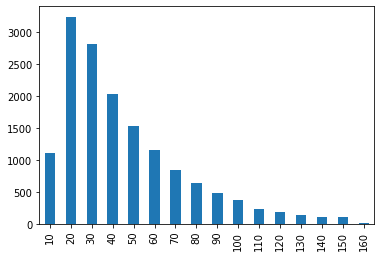

In [14]:
train_df['길이영역'].value_counts().sort_index().plot.bar()

In [23]:
# Word Cloud
!pip install konlpy

  Preparing metadata (setup.py) ... done
  Created wheel for install-jdk: filename=install_jdk-0.3.0-py3-none-any.whl size=3741 sha256=474c099f94a5901274a6626d8eca3205f78c76bd26bf5dc07d28d5246d93c047
  Stored in directory: /root/.cache/pip/wheels/89/a9/a3/03dc102cdcd442b9bca361f8c64fd4bb9b47ce75d9c8d56c91
Successfully built install-jdk


In [24]:
# not working properly try at local or colab
from collections import defaultdict
from konlpy.tag import Hannanum

hannanum = Hannanum()
classes_label = train_df.columns[1:11]

dict_total = defaultdict(int)
dict_word_group = dict()

for label in classes_label:
    dict_word_group[label] = defaultdict(int)


for index, row in train_df.iterrows():
    text = row['문장']
    temp_list = hannanum.pos(text)

    for word in temp_list:
        if word[1] in ['N']:
            dict_total[word[0]] += 1
            for label in classes_label:
                if row[label] == 1:
                    dict_word_group[label][word[0]] += 1

JVMNotFoundException: No JVM shared library file (libjvm.so) found. Try setting up the JAVA_HOME environment variable properly.

In [ ]:
sorted(dict_word_group['지역'].items(), key=lambda x: x[1], reverse=True)[:50]

In [ ]:
classes_label = train_df.columns[1:11]

In [ ]:
#!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
wc = WordCloud(font_path=path, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(dict_word_group['clean'])
plt.figure()
plt.imshow(gen)

In [5]:
# Check stop words
import re

check_str = '([^ㄱ-힣a-zA-Z0-9.,?!%~\(\)\^;=:\-<>+\"\/\♡♥\🙏ᆢ\'@&#★🐕\^\*\_ㅡ😓😠ㆍ盧ᆞ\\”“《》\[\]…`‘’—○×🐷 ])'
train_df[train_df['문장'].str.contains(check_str)]

<ipython-input-5-aa8d86f8178e>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  train_df[train_df['문장'].str.contains(check_str)]


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
2794,박근혜가 아니고 보지신이 환생해서 정치한다고 해도 지지하고 말고는 내 마음이다. 니...,0,0,0,0,0,0,0,0,1,0,0
3461,토루코 좆나 더럽고 사기꾼 좆나 많다 술사준다고 하면서 접근하는 인간들 조심하고 음...,0,0,0,1,0,0,0,0,0,0,0
5047,동성애와 에이즈 문제에 관한 보도를 제한하는 ‘인권보도준칙’을 만들고 퀴어행사에도 ...,0,0,1,0,0,0,0,0,0,0,0
6336,야쿠르트 미소녀 Σ(･ω･),0,0,0,0,0,0,0,0,0,1,0
7324,Hình xăm đẹp.베트콩 새끼들도 이쁜년은 존나 꼴릿하던데 씨벌 ㅠㅠ,1,0,0,1,0,0,0,0,0,0,0
7798,워념갔으니 국정원에서 뽀오나스 들어오겠노 부롭노|~~~~,0,0,0,0,0,0,0,0,1,0,0
8016,☆★☆개독과 개슬람 박멸에 힘쓰는 워마드 적극 응원합니다☆★☆,0,0,0,0,0,0,1,0,0,0,0
8059,어이어이... 저런 동남아민족의 혼혈따위 자랑스러운 대한의 「순수혈통」통베충의 외모...,0,0,0,1,0,0,0,0,0,0,0
10985,세계각국 A형간염 확산원인 : 동성애 (원인 : 대변→입 세균경로 + 난교 때문에),0,0,1,0,0,0,0,0,0,0,0
12086,항문성교❤,0,0,1,0,0,0,0,0,0,0,0


In [26]:
import re

# pre-processing function
foreign_dict = ['Hình', 'xăm', 'đẹp']

def pre_processing(text):
    
    for word in foreign_dict:
        if word in text:
            text = text.replace(word, '')
    
    text = re.sub('[^ㄱ-힣a-zA-Z0-9 ]', ' ', text)    
    text = re.sub(' +', ' ', text)
    
    result_text = text[0]
    cnt = 0
    
    for alpha in text[1:]:
        if result_text[-1] == alpha:
            cnt += 1
        else:
            cnt = 0

        if cnt < 3:
            result_text += alpha
        else:
            continue
        
    return result_text

In [27]:
train_df['문장2'] = train_df['문장'].apply(lambda x: pre_processing(x))
test_df['문장2'] = test_df['문장'].apply(lambda x: pre_processing(x))

In [29]:
train_df['문장2'].iloc[[7324, 8016, 13724, 14027]]

7324                                  베트콩 새끼들도 이쁜년은 존나 꼴릿하던데 씨벌 ㅠㅠ
8016                                 개독과 개슬람 박멸에 힘쓰는 워마드 적극 응원합니다 
13724    정말 제발 다들 팩트를 알았으면 좋겠네 동성애는 치료받아야할 병이라고 말 못하게하는 나라가 문제야문제 
14027                                                     충성 충 ㅋㅋㅋ
Name: 문장2, dtype: object

In [28]:
unsmile_labels = ["여성/가족","남성","성소수자","인종/국적","연령","지역","종교","기타 혐오","악플/욕설","clean"]

In [30]:
# make labels format like [0,0,...,1,0]
def make_label_list(row):
    temp_list = []
    for col in unsmile_labels:
        temp_list.append(row[col])
    return temp_list

In [31]:
train_df['labels'] = train_df.apply(lambda x: make_label_list(x), axis=1)
test_df['labels'] = test_df.apply(lambda x: make_label_list(x), axis=1)

In [32]:
train_df.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,길이영역,길이,multi_label,문장2,labels
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,30,22,1,일안하는 시간은 쉬고싶어서 그런게 아닐까,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. 10 16까지 IQ 떨어지고 출산 위험은 400% 다.,0,0,0,0,0,0,1,0,0,0,0,80,76,1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다 무슬림 50퍼 근친이다 10 16까지 IQ 떨어지고 출산 위험은 400 다,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
2,"루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈""",0,0,0,0,0,0,0,0,0,1,0,60,56,1,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐?,0,0,0,0,0,0,0,0,0,1,0,60,57,1,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런다! 이렇게 2개로 싸우냐.. 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데,1,0,0,0,0,0,0,0,0,0,0,100,91,1,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다 여자들은 더 심하게 그런다 이렇게 2개로 싸우냐 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [33]:
train_df['label'] = train_df['labels'].apply(lambda x: unsmile_labels[x.index(1)])
test_df['label'] = test_df['labels'].apply(lambda x: unsmile_labels[x.index(1)])

ValueError: 1 is not in list

In [34]:
# delete no labeled row
train_df = train_df.drop(5876)
train_df = train_df.drop(11942)

In [35]:
train_df['label'] = train_df['labels'].apply(lambda x: unsmile_labels[x.index(1)])
test_df['label'] = test_df['labels'].apply(lambda x: unsmile_labels[x.index(1)])

In [36]:
train_df.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,길이영역,길이,multi_label,문장2,labels,label
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,30,22,1,일안하는 시간은 쉬고싶어서 그런게 아닐까,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",clean
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. 10 16까지 IQ 떨어지고 출산 위험은 400% 다.,0,0,0,0,0,0,1,0,0,0,0,80,76,1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다 무슬림 50퍼 근친이다 10 16까지 IQ 떨어지고 출산 위험은 400 다,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",종교
2,"루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈""",0,0,0,0,0,0,0,0,0,1,0,60,56,1,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",clean
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐?,0,0,0,0,0,0,0,0,0,1,0,60,57,1,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",clean
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런다! 이렇게 2개로 싸우냐.. 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데,1,0,0,0,0,0,0,0,0,0,0,100,91,1,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다 여자들은 더 심하게 그런다 이렇게 2개로 싸우냐 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",여성/가족


---
기본적인 EDA와 전처리를 진행하였으며, Word Cloud를 통해 각 클래스별 주요 단어를 시각화하여 표현하려했으나, Sagemaker에 java를 설치하는 방법을 아직 모르겠다....